In [1]:
import pandas as pd 
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv(r'data\titanic_limpio.csv')

In [4]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tiene_cabina
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Sin Datos,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


### Porcentaje de supervivientes

In [5]:
porcentaje_supervivientes = df['Survived'].mean() * 100

porcentaje_supervivientes

np.float64(38.38383838383838)

In [7]:
supervivientes_por_clase = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
supervivientes_por_clase.columns = ['Total_Pasajeros', 'Supervivientes', 'Porcentaje']
supervivientes_por_clase['Porcentaje'] = supervivientes_por_clase['Porcentaje'] * 100


supervivientes_por_clase

,Total_Pasajeros,Supervivientes,Porcentaje
Pclass,,,
1,216,136,62.962963
2,184,87,47.282609
3,491,119,24.236253


In [19]:
px.bar(
    supervivientes_por_clase.reset_index(), 
    x='Pclass',
    y='Porcentaje',
    text='Porcentaje',
    title='Porcentaje de Supervivientes por Clase',
    labels={'Pclass': 'Clase', 'Porcentaje': 'Porcentaje de Supervivientes (%)'},
    template='plotly_dark'  
)

In [13]:
px.pie(
    supervivientes_por_clase.reset_index(),
    names='Pclass',
    values='Porcentaje',
    title='Porcentaje de Supervivientes por Clase',
    labels={'Pclass': 'Clase'},
    template='plotly_dark'
)


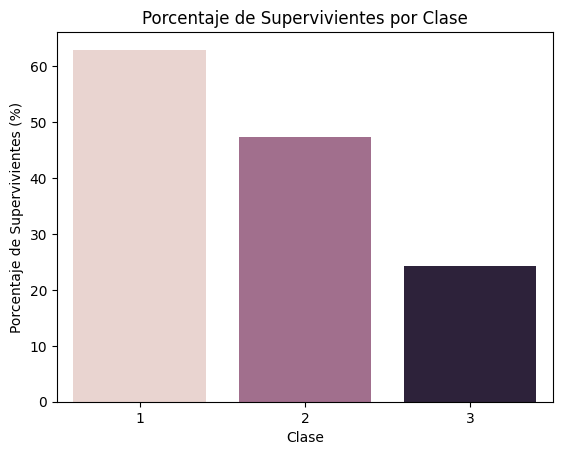

In [17]:
sns.barplot(
    data=supervivientes_por_clase.reset_index(),
    x='Pclass',
    y='Porcentaje',
    hue='Pclass',
    dodge=False
).set(
    title='Porcentaje de Supervivientes por Clase',
    xlabel='Clase',
    ylabel='Porcentaje de Supervivientes (%)'
)
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

### los apellido más repetidos por clase

In [11]:
df['Apellido'] = df['Name'].str.split(',').str[0]

apellidos_por_clase = df.groupby(['Pclass', 'Apellido']).size().reset_index(name='Frecuencia') # contamos con el size con el nombre frecuencia basado en pcclass y apellido

# apellidos más comunes por clase
apellidos_mas_comunes = apellidos_por_clase.sort_values(['Pclass', 'Frecuencia'], ascending=[True, False])

# creamos un DataFrame con los 3 apellidos más comunes por clase
top_apellidos_por_clase = (apellidos_mas_comunes.groupby('Pclass')
                           .apply(lambda x: x.nlargest(3, 'Frecuencia'))
                           .reset_index(drop=True))


top_apellidos_por_clase

C:\Users\demst\AppData\Local\Temp\ipykernel_52164\613689901.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'Frecuencia'))


,Pclass,Apellido,Frecuencia
0,1,Carter,4
1,1,Fortune,4
2,1,Allison,3
3,2,Brown,3
4,2,Collyer,3
5,2,Hart,3
6,3,Andersson,9
7,3,Sage,7
8,3,Goodwin,6


In [25]:
top_apellidos_por_clase['Clase'] = top_apellidos_por_clase['Pclass'].map({1: 'Primera Clase', 
                                                                        2: 'Segunda Clase', 
                                                                        3: 'Tercera Clase'})

fig = px.bar(
    top_apellidos_por_clase,
    x='Apellido',
    y='Frecuencia',
    color='Clase',
    text='Frecuencia',
    title='Los 3 Apellidos más Comunes por Clase en el Titanic',
    labels={'Frecuencia': 'Cantidad de Pasajeros', 'Apellido': 'Apellido'},
    color_discrete_sequence=px.colors.qualitative.Set1,
    barmode='group',
    template='plotly_dark'
)

fig.update_traces(
    textposition='outside',
    textfont=dict(size=12)
)

fig.update_layout(
    xaxis_title='Apellido',
    yaxis_title='Frecuencia',
    legend_title='Clase',
    font=dict(size=14)
)

fig.show()

In [ ]:
#!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


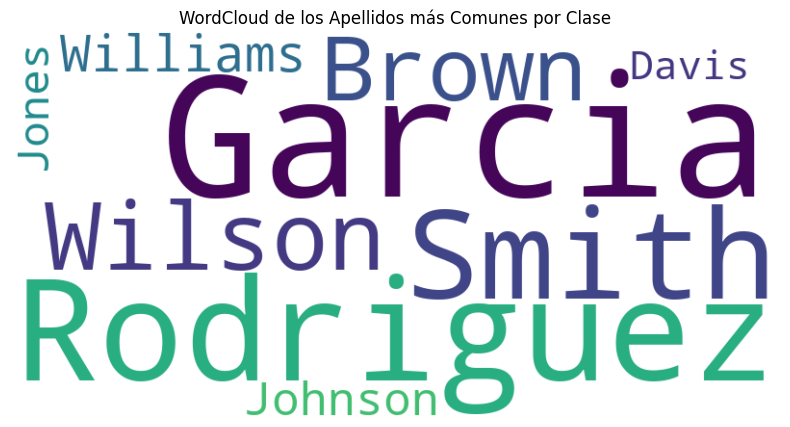

In [28]:
from wordcloud import WordCloud

# Crear un diccionario con los apellidos y sus frecuencias
frecuencia_apellidos = dict(zip(top_apellidos_por_clase['Apellido'], top_apellidos_por_clase['Frecuencia']))

# Generar el WordCloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate_from_frequencies(frecuencia_apellidos)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de los Apellidos más Comunes por Clase')
plt.show()


In [12]:
apellido_mas_comun = df['Apellido'].value_counts().nlargest(1)
apellido_mas_comun

Apellido
Andersson    9
Name: count, dtype: int64

In [26]:
# Extraer apellidos
df['LastName'] = df['Name'].str.split(',').str[0]
 
# Contar apellidos más repetidos por clase
apellidos_por_clase = df.groupby('Pclass')['LastName'].value_counts().groupby(level=0).head(3)
apellidos_por_clase

Pclass  LastName 
1       Carter       4
        Fortune      4
        Allison      3
2       Brown        3
        Collyer      3
        Hart         3
3       Andersson    9
        Sage         7
        Goodwin      6
Name: count, dtype: int64

### Precio medio por clase

In [13]:
precio_medio_por_clase = df.groupby('Pclass')['Fare'].agg(['mean', 'median', 'min', 'max', 'std'])
precio_medio_por_clase = precio_medio_por_clase.round(2)
precio_medio_por_clase

,mean,median,min,max,std
Pclass,,,,,
1,84.15,60.29,0.0,512.33,78.38
2,20.66,14.25,0.0,73.50,13.42
3,13.68,8.05,0.0,69.55,11.78


### edad por clase

In [14]:
edad_por_clase = df.groupby('Pclass')['Age'].agg(['mean', 'median', 'min', 'max', 'std', 'count'])
edad_por_clase = edad_por_clase.round(2)
edad_por_clase

,mean,median,min,max,std,count
Pclass,,,,,,
1,36.81,35.0,0.92,80.0,14.18,216
2,29.77,28.0,0.67,70.0,13.58,184
3,25.93,28.0,0.42,74.0,10.70,491


### supervivientes por rangos de edad

In [15]:
bins = [0, 5, 12, 18, 35, 60, np.inf] #usando bins para establecer rangos
labels = ['Bebé (0-5)', 'Niño (5-12)', 'Adolescente (12-18)', 'Joven (18-35)', 'Adulto (35-60)', 'Mayor (60+)']
df['Rango_Edad'] = pd.cut(df['Age'], bins=bins, labels=labels)# creamos nuueva col para esos rangos

In [16]:
supervivientes_por_edad = df.groupby('Rango_Edad')['Survived'].agg(['count', 'sum', 'mean'])
supervivientes_por_edad.columns = ['Total', 'Supervivientes', 'Porcentaje']
supervivientes_por_edad['Porcentaje'] = supervivientes_por_edad['Porcentaje'] * 100

C:\Users\demst\AppData\Local\Temp\ipykernel_52164\4062204627.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  supervivientes_por_edad = df.groupby('Rango_Edad')['Survived'].agg(['count', 'sum', 'mean'])


In [17]:
supervivientes_por_edad

,Total,Supervivientes,Porcentaje
Rango_Edad,,,
Bebé (0-5),44,31,70.454545
Niño (5-12),25,9,36.000000
Adolescente (12-18),70,30,42.857143
Joven (18-35),535,189,35.327103
Adulto (35-60),195,78,40.000000
Mayor (60+),22,5,22.727273


In [31]:
# Ensure 'Rango_Edad' column exists in the dataframe
if 'Rango_Edad' not in df.columns:
    bins = [0, 5, 12, 18, 35, 60, np.inf]  # Define age bins
    labels = ['Bebé (0-5)', 'Niño (5-12)', 'Adolescente (12-18)', 'Joven (18-35)', 'Adulto (35-60)', 'Mayor (60+)']
    df['Rango_Edad'] = pd.cut(df['Age'], bins=bins, labels=labels)  # Create 'Rango_Edad' column

# Calculate survival statistics by age range
supervivientes_por_edad = df.groupby('Rango_Edad')['Survived'].agg(['count', 'sum', 'mean'])
supervivientes_por_edad.columns = ['Total', 'Supervivientes', 'Porcentaje']
supervivientes_por_edad['Porcentaje'] = supervivientes_por_edad['Porcentaje'] * 100

# Reset index to use in the plot
supervivientes_por_edad = supervivientes_por_edad.reset_index()

# Plot the data
fig = px.bar(
    supervivientes_por_edad,
    x='Rango_Edad',
    y='Porcentaje',
    color='Porcentaje',  # Colorear según el porcentaje
    text='Porcentaje',   # Mostrar el porcentaje como texto
    hover_data=['Total', 'Supervivientes'],  # Datos adicionales al pasar el cursor
    title='Porcentaje de Supervivencia por Rango de Edad en el Titanic',
    labels={'Porcentaje': 'Supervivencia (%)', 'Rango_Edad': 'Grupo de Edad'},
    color_continuous_scale='RdYlGn'  # Escala de colores: rojo (bajo) a verde (alto)
)

# Ajustamos el formato del texto
fig.update_traces(
    texttemplate='%{text:.1f}%',  # Formato con un decimal y símbolo de porcentaje
    textposition='outside'        # Texto fuera de las barras
)

# Personalizamos el diseño
fig.update_layout(
    xaxis_title='Grupo de Edad',
    yaxis_title='Porcentaje de Supervivencia (%)',
    yaxis_range=[0, max(supervivientes_por_edad['Porcentaje']) * 1.1],  # Ajustar rango eje Y
    coloraxis_colorbar=dict(title='% Supervivencia')
)

# Mostramos el gráfico
fig.show()

C:\Users\demst\AppData\Local\Temp\ipykernel_70760\1010409808.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [35]:
fig = px.treemap(
    supervivientes_por_edad,
    path=['Rango_Edad'],  # Agrupamos por rango de edad
    values='Total',       # Tamaño de los rectángulos basado en el total de pasajeros
    color='Porcentaje',   # Color basado en el porcentaje de supervivencia
    hover_data=['Supervivientes', 'Porcentaje'],  # Información adicional al pasar el cursor
    title='Treemap de Supervivencia por Rango de Edad en el Titanic',
    color_continuous_scale='RdYlGn' , # Escala de colores: rojo (bajo) a verde (alto)
    template='plotly_dark'  # Estilo oscuro
)

# Mostramos el gráfico
fig.show()


### % de supervencia entre hombres, mujeres y ninos por clase

In [18]:
df['GrupoEdadSexo'] = 'Adulto'
df.loc[df['Age'] < 12, 'GrupoEdadSexo'] = 'Niño'

df.loc[(df['Age'] >= 12) & (df['Sex'] == 'male'), 'GrupoEdadSexo'] = 'Hombre'
df.loc[(df['Age'] >= 12) & (df['Sex'] == 'female'), 'GrupoEdadSexo'] = 'Mujer'

supervivencia_grupo_clase = pd.pivot_table(
    df, 
    values='Survived',
    index='Pclass',
    columns='GrupoEdadSexo',
    aggfunc='mean'
) * 100

supervivencia_grupo_clase.round(2)

GrupoEdadSexo,Hombre,Mujer,Niño
Pclass,,,
1,35.29,97.85,75.00
2,8.08,91.18,100.00
3,12.07,50.41,40.43


In [19]:
conteo_grupo_clase = pd.pivot_table(
    df, 
    values='PassengerId',
    index='Pclass',
    columns='GrupoEdadSexo',
    aggfunc='count'
)


conteo_grupo_clase

GrupoEdadSexo,Hombre,Mujer,Niño
Pclass,,,
1,119,93,4
2,99,68,17
3,323,121,47


In [21]:
# tabla combinada con porcentaje y conteo
print("\nTabla combinada (porcentaje % [conteo]):")
tabla_combinada = supervivencia_grupo_clase.round(1).astype(str) + '% [' + conteo_grupo_clase.astype(str) + ']'
tabla_combinada


Tabla combinada (porcentaje % [conteo]):


GrupoEdadSexo,Hombre,Mujer,Niño
Pclass,,,
1,35.3% [119],97.8% [93],75.0% [4]
2,8.1% [99],91.2% [68],100.0% [17]
3,12.1% [323],50.4% [121],40.4% [47]


In [40]:
# Asegurarse de que la columna 'GrupoEdadSexo' exista
if 'GrupoEdadSexo' not in df.columns:
    df['GrupoEdadSexo'] = 'Adulto'
    df.loc[df['Age'] < 12, 'GrupoEdadSexo'] = 'Niño'
    df.loc[(df['Age'] >= 12) & (df['Sex'] == 'male'), 'GrupoEdadSexo'] = 'Hombre'
    df.loc[(df['Age'] >= 12) & (df['Sex'] == 'female'), 'GrupoEdadSexo'] = 'Mujer'

# Crear datos para el heatmap
heatmap_data = df.pivot_table(
    index='GrupoEdadSexo',
    columns='Pclass',
    values='Survived',
    aggfunc='mean'
) * 100

# Crear el heatmap con Plotly
fig = px.imshow(
    heatmap_data,
    labels=dict(x="Clase", y="Grupo", color="Supervivencia (%)"),
    x=['Primera Clase', 'Segunda Clase', 'Tercera Clase'],
    y=heatmap_data.index,
    color_continuous_scale='RdYlGn',
    range_color=[0, 100],
    title="Mapa de Calor de Supervivencia en el Titanic"
)

# Añadir anotaciones con porcentaje y conteo
for i, grupo in enumerate(heatmap_data.index):
    for j, clase in enumerate(heatmap_data.columns):
        porcentaje = heatmap_data.iloc[i, j]
        conteo = df[(df['GrupoEdadSexo'] == grupo) & (df['Pclass'] == clase)].shape[0]
        fig.add_annotation(
            x=j,
            y=i,
            text=f"{porcentaje:.1f}%<br>[{conteo}]",
            showarrow=False,
            font=dict(
                color='black' if 30 < porcentaje < 70 else 'white',
                size=12
            )
        )

# Ajustar el diseño y mostrar el gráfico
fig.update_layout(height=500)
fig.show()


### supervivientes por sexo

In [22]:
supervivientes_por_sexo = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
supervivientes_por_sexo.columns = ['Total', 'Supervivientes', 'Porcentaje']
supervivientes_por_sexo['Porcentaje'] = supervivientes_por_sexo['Porcentaje'] * 100

supervivientes_por_sexo.round(2)

,Total,Supervivientes,Porcentaje
Sex,,,
female,314,233,74.20
male,577,109,18.89


In [45]:
# Importar módulos necesarios
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Asegurarse de que 'supervivientes_por_sexo' esté definido
if 'supervivientes_por_sexo' not in locals():
    supervivientes_por_sexo = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
    supervivientes_por_sexo.columns = ['Total', 'Supervivientes', 'Porcentaje']
    supervivientes_por_sexo['Porcentaje'] = supervivientes_por_sexo['Porcentaje'] * 100

# Crear un DataFrame basado en 'supervivientes_por_sexo'
df_sexo = supervivientes_por_sexo.copy()
df_sexo['No_Supervivientes'] = df_sexo['Total'] - df_sexo['Supervivientes']

# Crear un gráfico de indicadores semicirculares (gauge) para mostrar el porcentaje de supervivencia por sexo
fig = make_subplots(
    rows=1, cols=2,  # Crear una figura con 1 fila y 2 columnas
    specs=[[{"type": "indicator"}, {"type": "indicator"}]],  # Especificar que ambas subtramas son indicadores
    subplot_titles=("Mujeres", "Hombres")  # Títulos de las subtramas
)

# Indicador para mujeres
fig.add_trace(
    go.Indicator(
        mode="gauge+number+delta",  # Mostrar un gauge, el valor numérico y la diferencia respecto a un valor de referencia
        value=df_sexo.loc['female', 'Porcentaje'],  # Valor del porcentaje de supervivencia para mujeres
        delta={"reference": 50, "increasing": {"color": "green"}},  # Diferencia respecto al 50% con color verde si aumenta
        gauge={
            "axis": {"range": [0, 100], "tickwidth": 1, "tickcolor": "darkblue"},  # Configuración del eje del gauge
            "bar": {"color": "royalblue"},  # Color de la barra del gauge
            "bgcolor": "white",  # Fondo del gauge
            "borderwidth": 2, "bordercolor": "gray",  # Borde del gauge
            "steps": [  # Colores para diferentes rangos
                {"range": [0, 25], "color": "red"},
                {"range": [25, 50], "color": "orange"},
                {"range": [50, 75], "color": "lightgreen"},
                {"range": [75, 100], "color": "green"},
            ],
            "threshold": {  # Línea de umbral que indica el valor actual
                "line": {"color": "black", "width": 4},
                "thickness": 0.75,
                "value": df_sexo.loc['female', 'Porcentaje']
            }
        }
    ),
    row=1, col=1  # Ubicar el indicador en la primera fila y primera columna
)

# Indicador para hombres
fig.add_trace(
    go.Indicator(
        mode="gauge+number+delta",  # Similar al indicador de mujeres
        value=df_sexo.loc['male', 'Porcentaje'],  # Valor del porcentaje de supervivencia para hombres
        delta={"reference": 50, "decreasing": {"color": "red"}},  # Diferencia respecto al 50% con color rojo si disminuye
        gauge={
            "axis": {"range": [0, 100], "tickwidth": 1, "tickcolor": "darkblue"},
            "bar": {"color": "darkred"},
            "bgcolor": "white",
            "borderwidth": 2, "bordercolor": "gray",
            "steps": [
                {"range": [0, 25], "color": "red"},
                {"range": [25, 50], "color": "orange"},
                {"range": [50, 75], "color": "lightgreen"},
                {"range": [75, 100], "color": "green"},
            ],
            "threshold": {
                "line": {"color": "black", "width": 4},
                "thickness": 0.75,
                "value": df_sexo.loc['male', 'Porcentaje']
            }
        }
    ),
    row=1, col=2  # Ubicar el indicador en la primera fila y segunda columna
)

# Actualizar el diseño del gráfico
fig.update_layout(
    title_text="Porcentaje de Supervivencia por Sexo en el Titanic",  # Título del gráfico
    font={"family": "Arial", "size": 12},  # Configuración de la fuente
    height=500,  # Altura del gráfico
    margin=dict(t=100, b=0, l=40, r=40),  # Márgenes del gráfico
)

# Mostrar el gráfico
fig.show()


## Cómo leer los gráficos de indicadores (gauge charts)

Estos gráficos muestran el porcentaje de supervivencia por sexo en el desastre del Titanic. A continuación, se explica cómo interpretarlos:

### Elementos principales

1. **Semicírculos coloridos**: Representan una escala de 0% a 100% de supervivencia, donde:
    - **Rojo (0-20%)**: Supervivencia muy baja.
    - **Naranja (20-40%)**: Supervivencia baja.
    - **Verde claro (40-60%)**: Supervivencia media.
    - **Verde oscuro (60-100%)**: Supervivencia alta.

2. **Agujas o marcadores negros**: Indican el valor exacto del porcentaje en la escala.

3. **Número grande central**: Muestra el porcentaje exacto de supervivencia:
    - **Mujeres**: 74.2%
    - **Hombres**: 18.9%

4. **Número con flecha**: Indica la comparación con un valor de referencia (probablemente 50%):
    - **Mujeres**: ▲24.2 (verde, 24.2% por encima del valor de referencia).
    - **Hombres**: ▼-31.1 (rojo, 31.1% por debajo del valor de referencia).

---

### Interpretación de los datos

- **Mujeres**: 
  - El indicador muestra que el **74.2% de las mujeres** sobrevivieron al hundimiento del Titanic.
  - La aguja apunta a la zona **verde oscuro**, y el número con flecha verde hacia arriba indica que este porcentaje está **24.2 puntos por encima** del valor de referencia.

- **Hombres**: 
  - El indicador muestra que solo el **18.9% de los hombres** sobrevivieron.
  - La aguja apunta a la zona **roja**, y el número con flecha roja hacia abajo indica que este porcentaje está **31.1 puntos por debajo** del valor de referencia.

---

### Conclusión

Esta visualización resalta claramente la enorme diferencia en las tasas de supervivencia entre hombres y mujeres, ilustrando la política de **"mujeres y niños primero"** que se aplicó durante el desastre del Titanic.